In [38]:
print(master_df)

      order_id           order_date  product_id  quantity  sale_price  \
0         1000  2024-12-12 01:38:21         108         1      178.94   
1         1004  2024-11-05 02:28:28         108         1      171.10   
2         1016  2025-03-03 08:14:35         108         2      164.68   
3         1017  2025-07-02 12:20:00         108         1      147.70   
4         1020  2024-12-14 12:27:40         108         1      152.09   
...        ...                  ...         ...       ...         ...   
1195      2144  2025-05-15 23:26:48         110         1      471.68   
1196      2146  2025-04-25 13:15:06         110         1      437.36   
1197      2148  2025-05-09 08:23:52         110         1      426.24   
1198      2173  2025-09-09 00:37:59         110         1      495.05   
1199      2185  2024-12-13 19:57:21         110         4      445.63   

         product_name     category  cost_price  supplier_id   supplier_name  \
0     Docking Station  Accessories         1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       1200 non-null   int64  
 1   order_date     1200 non-null   object 
 2   product_id     1200 non-null   int64  
 3   quantity       1200 non-null   int64  
 4   sale_price     1200 non-null   float64
 5   product_name   1200 non-null   object 
 6   category       1200 non-null   object 
 7   cost_price     1200 non-null   int64  
 8   supplier_id    1200 non-null   int64  
 9   supplier_name  1200 non-null   object 
 10  location       1200 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 103.3+ KB


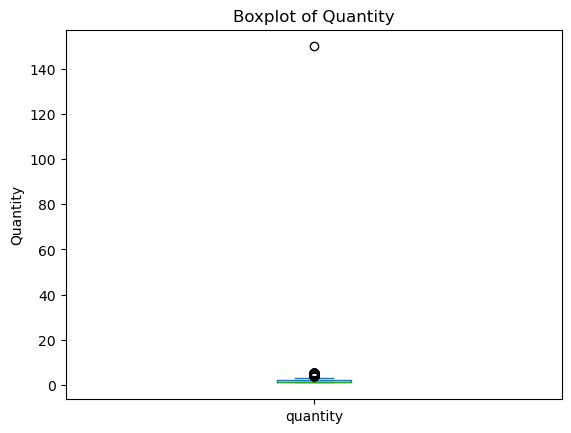

    Year  Month Month_Name   revenue
0   2024     10        Oct  39784.50
1   2024     11        Nov  38715.12
2   2024     12        Dec  48777.05
3   2025      1        Jan  46513.04
4   2025      2        Feb  39770.54
5   2025      3        Mar  46531.07
6   2025      4        Apr  53353.06
7   2025      5        May  45235.44
8   2025      6        Jun  57171.37
9   2025      7        Jul  50363.14
10  2025      8        Aug  71647.02
11  2025      9        Sep  44232.44
12  2025     10        Oct  10184.81


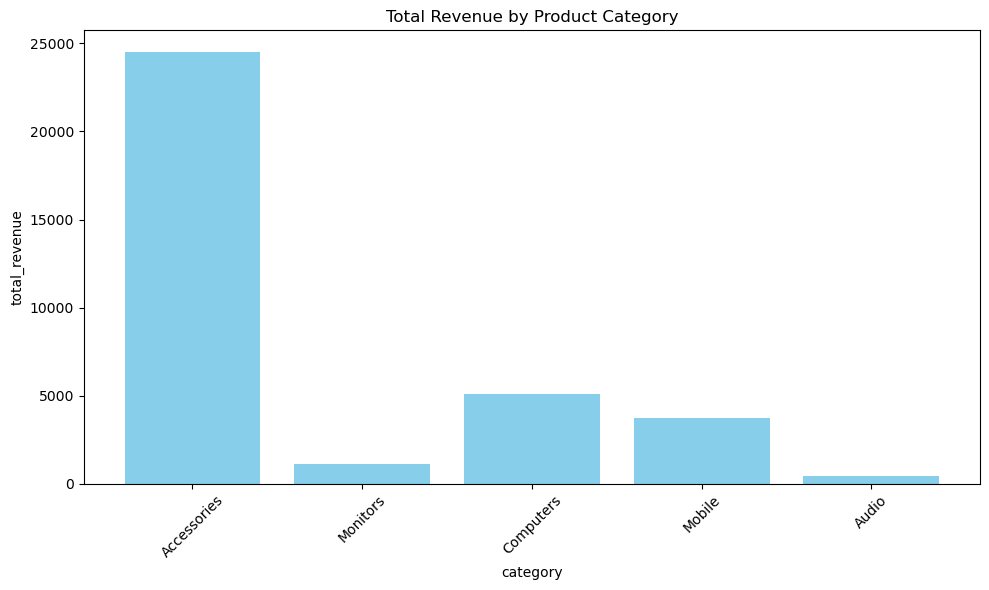

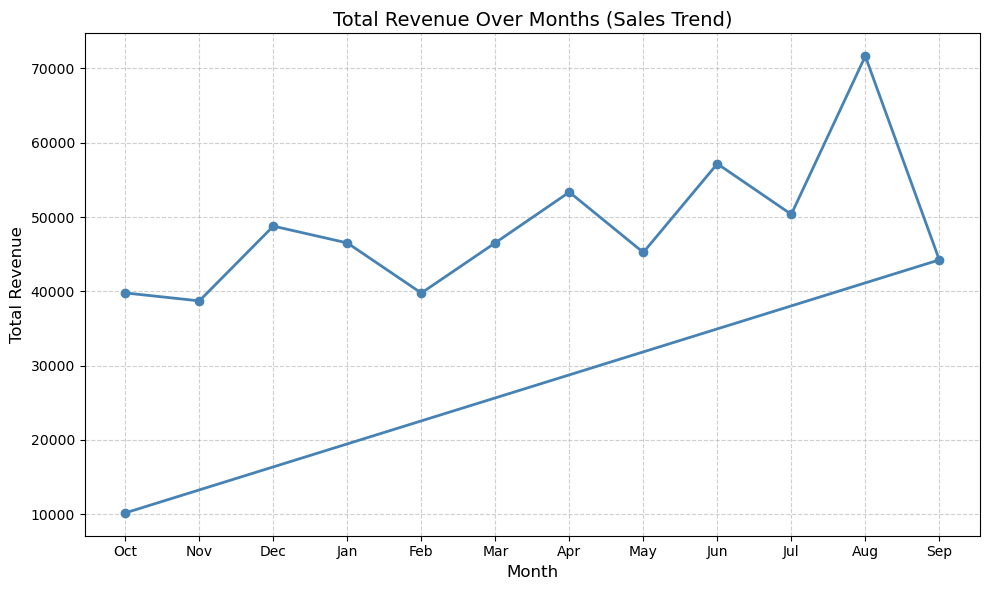

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns

#*STEP1*
#Load the Data
sales_part1=pd.read_csv("sales_part1.xls")
sales_part2=pd.read_csv("sales_part2.xls")
products=pd.read_csv("products.xls")
suppliers=pd.read_csv("suppliers.xls")
#Append Sales Data
all_sales=pd.concat([sales_part1,sales_part2])
#Merge with Product Details
merged_df_1=pd.merge(all_sales,products,on='product_id')
#Merge with Supplier Details
master_df=pd.merge(merged_df_1,suppliers,on='supplier_id',how='left')

#*STEP2*
#Initial Inspection
#Info
master_df.info()
#Describe
master_df.describe()
#Calculate Key Metrics
#Revenue 
master_df['revenue'] = master_df['quantity'] * master_df['sale_price']
#Profit
master_df['profit'] = (master_df['sale_price'] - master_df['cost_price']) * master_df['quantity']
#Identify and Filter Outliers
master_df["quantity"].plot(kind="box")
plt.title("Boxplot of Quantity")
plt.ylabel("Quantity")
plt.show()

#*STEP3*
#Top Performing Categories
total_revenue = master_df.groupby("category")[["revenue", "profit"]].sum().reset_index()
#Supplier Performance
supplier_summary = master_df.groupby('supplier_name')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)
#Monthly Sales Trend
master_df["order_date"] = pd.to_datetime(master_df["order_date"], format="%Y-%m-%d %H:%M:%S")
master_df["Year"] = master_df["order_date"].dt.year
master_df["Month"] = master_df["order_date"].dt.month
master_df["Month_Name"] = master_df["order_date"].dt.strftime("%b") 
monthly_sales = (master_df.groupby(["Year", "Month", "Month_Name"])["revenue"].sum().reset_index().sort_values(["Year", "Month"]))
print(monthly_sales)

#*STEP4*
#Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(master_df['category'],master_df['revenue'], color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('category')
plt.ylabel('total_revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_by_category.png')
plt.show()

#Line Chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales["Month_Name"],monthly_sales["revenue"],marker="o",linestyle="-",color="steelblue",linewidth=2)
plt.title("Total Revenue Over Months (Sales Trend)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()